In [ ]:
!pip install sqlalchemy
!pip install pymysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 828.6 kB/s eta 0:00:00


In [ ]:
import pymysql.cursors
from sqlalchemy import create_engine

In [ ]:
host = 'den1.mysql6.gear.host'
db = 'situation'
usr = 'situation'
psword = input()

# Connect to the database
engine = create_engine('mysql+pymysql://%s:%s@%s:%s/%s?charset=utf8'
                       % (usr, psword, host, '3306', db))


In [ ]:
import pandas as pd

In [ ]:
UserId = 'toipha'
sql = "SELECT * FROM situation.o15_environmental_data;"

# with connection.cursor() as cursor:
#   cursor.execute(sql % UserId)

df_raw = pd.read_sql(sql, engine)
print(df_raw)

    id          location           timestamp     image_url   NO2  PM2_5  PM10  \
0    1      New York, NY 2024-04-30 12:00:00   image_url_1  24.5   15.0  20.0   
1    2   Los Angeles, CA 2024-04-30 13:00:00   image_url_2  20.0   25.0  30.0   
2    3       Chicago, IL 2024-04-30 14:00:00   image_url_3  18.0   20.0  25.0   
3    4       Houston, TX 2024-04-30 15:00:00   image_url_4  22.0   23.0  27.0   
4    5       Phoenix, AZ 2024-04-30 16:00:00   image_url_5  10.0   12.0  15.0   
5    6  Philadelphia, PA 2024-04-30 17:00:00   image_url_6  25.0   16.0  22.0   
6    7   San Antonio, TX 2024-04-30 18:00:00   image_url_7  21.0   18.0  24.0   
7    8     San Diego, CA 2024-04-30 19:00:00   image_url_8  19.0   14.0  19.0   
8    9        Dallas, TX 2024-04-30 20:00:00   image_url_9  23.0   21.0  26.0   
9   10      San Jose, CA 2024-04-30 21:00:00  image_url_10  15.0   13.0  18.0   
10  11        Austin, TX 2024-04-30 22:00:00  image_url_11  17.0   22.0  23.0   
11  12  Jacksonville, FL 202

In [ ]:
!pip install matplotlib

The data import is done, assignment2 begin: Analysis for data

In [ ]:
# Data analysis
import matplotlib.pyplot as plt

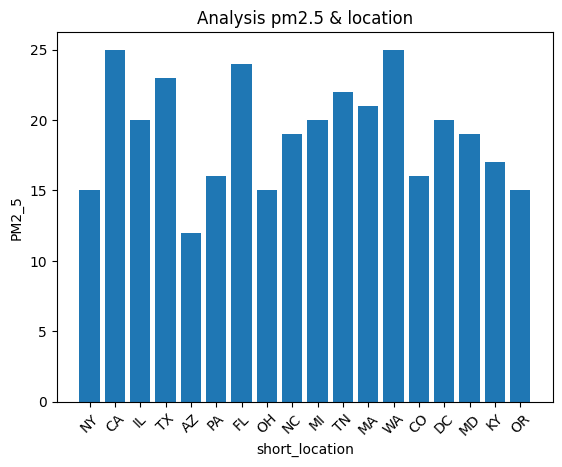

In [ ]:
# Location & PM2.5
df_raw['short_location'] = df_raw['location'].apply(lambda x: x[-2:])
plt.bar(df_raw['short_location'], df_raw['PM2_5'])
plt.xlabel('short_location', fontsize=10)
plt.xticks(rotation=45)
plt.ylabel('PM2_5')
plt.title('Analysis pm2.5 & location')
plt.show()

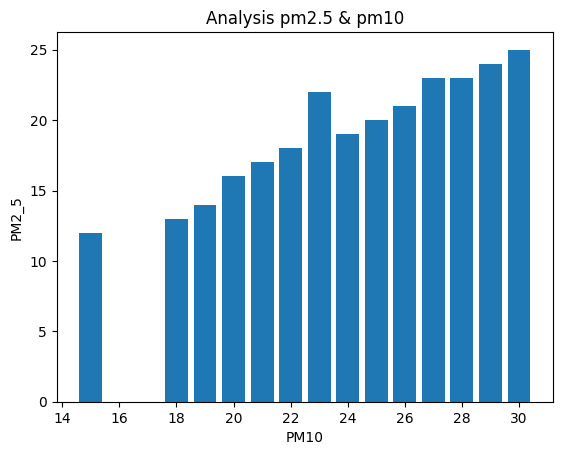

In [ ]:
#PM10 & PM2.5
plt.bar(df_raw['PM10'], df_raw['PM2_5'])
plt.xlabel('PM10')
plt.ylabel('PM2_5')
plt.title('Analysis pm2.5 & pm10')
plt.show()


Intuitively, the levels of PM2.5 and PM10 should be highly correlated. Therefore, a bar chart is used for a preliminary analysis to see if it aligns with our assumptions.(Turned out to be true)

In [20]:
!pip install seaborn
import seaborn as sns

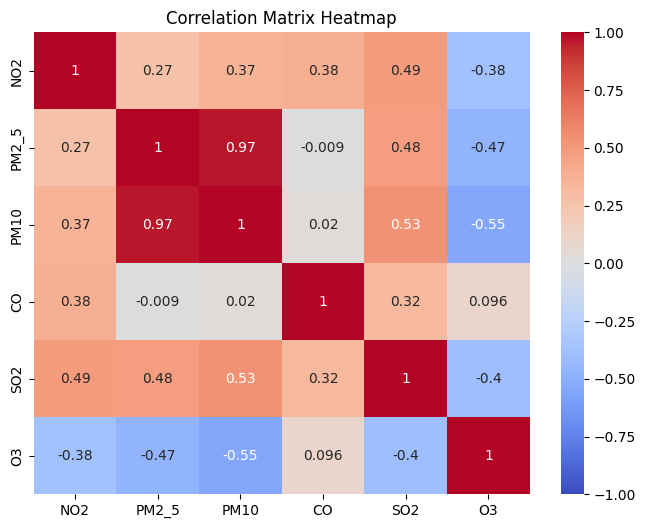

In [18]:
# Co-related Matrix
df_only_number = df_raw[['NO2', 'PM2_5', 'PM10', 'CO', 'SO2', 'O3']]
corr_matrix = df_only_number.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

To further understand which indicators affect PM2.5 levels, a correlation matrix was created to help with the assessment.

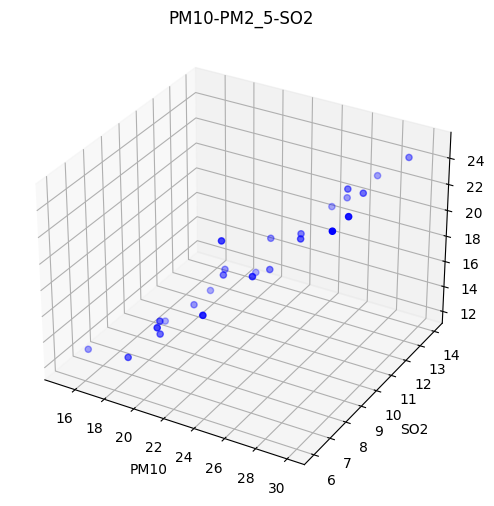

In [19]:
# 3D dot
ThreeD = plt.figure(figsize=(10, 6))
ax = ThreeD.add_subplot(111, projection='3d')
ax.scatter(df_raw['PM10'], df_raw['SO2'], df_raw['PM2_5'], c='b', marker='o')

ax.set_xlabel('PM10')
ax.set_ylabel('SO2')
ax.set_zlabel('PM2_5')
plt.title('PM10-PM2_5-SO2')
plt.show()

From the correaltion matrix, the top two related indicators of the level of PM2.5 are SO2 and PM10, hence use the three to draw 3D dot diagram as below. Until this point our analysis of data is done!